# Atividade: Efeito da Fase e Sistemas Radar

Entregue os resultados na forma de um Jupyter Notebook, via Moodle, com todo o código, resultados (figuras e arquivos extras, se necessário), análise e conclusões.

Até o momento, nos preocupamos apenas com a **magnitude** da resposta em frequência de filtros seletores de sinais. Nesta atividade, iremos analisar o efeito da fase.

In [1]:
import numpy as np
from scipy.signal import lfilter
import matplotlib.pyplot as plt
from scipy.signal import freqz


from IPython.display import (Audio, display, Image, clear_output)

## Fase da resposta em frequência de um filtro analógico

Considere um filtro passa-baixas analógico RC de 1a. ordem, com R=6,8 k$\Omega$ e C=22 nF.

In [2]:
def plot_lp(w:np.array, h:np.array, wc:float=None):
    '''
    w in radians/s
    '''
    w = w/(2*np.pi)
    plt.subplots(1,2,figsize=(12,4))

    plt.subplot(1,2,1)
    plt.plot(w, np.abs(h))
    plt.title('Magnitude')
    plt.xlabel('Frequency (Hz)')
    if wc:
        plt.vlines(wc, 0, 1/np.sqrt(2), 'red', 'dashed')
        plt.hlines(1/np.sqrt(2), 0, wc, 'red', 'dashed')

    plt.subplot(1,2,2)
    plt.plot(w, np.angle(h)*180/np.pi)
    plt.title('Phase')
    plt.xlabel('Frequency (Hz)')
    if wc:
        plt.vlines(wc, -45, -90, 'red', 'dashed')
        plt.hlines(-45, 0, wc, 'red', 'dashed')

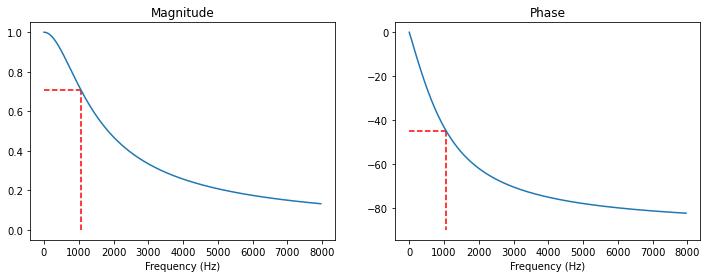

In [3]:
R = 6.8e3
C = 22e-9
TF = lambda w: 1/(1 + 1j*w*R*C)

w = np.linspace(0, 50000, 512)
h = np.vectorize(TF)(w) 
plot_lp(w,h, 1063)

A. Qual a frequência de corte deste filtro?

In [4]:
wc = 1/(R*C)
print(f'Frequência de corte = {wc/(2*np.pi)} Hz')

Frequência de corte = 1063.869940453846 Hz


B. Qual a magnitude da resposta em frequência exatamente na frequência de corte?

In [5]:
print(f'Magntude será {np.abs(TF(wc))}')

Magntude será 0.7071067811865476


C. Qual a fase da resposta em frequência exatamente na frequência de corte?

In [6]:
print(f'Fase será {np.angle(TF(wc))*180/np.pi} º')

Fase será -45.0 º


D. Monte esse filtro no **VISIR** e meça a magnitude na frequência de corte. Mostre as imagens do osciloscópio e explique como você chegou nos resultados.

In [7]:
display(Image('images/circuit.png'))
display(Image('images/osci_wc.png'))
# Injetando uma senoide de frequência wc na entrada, mede-se a saída com o osciloscópio
print(f'O ganho é de {647.9/969.3}')


O ganho é de 0.6684205096461364


E. Ainda no VISIR, meça o atraso de fase na frequência de corte. Mostre as imagens do osciloscópio e explique como você chegou nos resultados.

In [8]:
# A partir da mesma medição anterior, observa-se a fase
print('A fase é de 74º')

A fase é de 74º


F. Qual o atraso de fase para uma frequência 10 vezes menor que a frequência de corte?

In [9]:
# Não foi possível realizar a medição, recebo os seguinte erro:
display(Image('images/error.png'))

G. Qual o atraso de fase para uma frequência 10 vezes maior que a frequência de corte?

In [10]:
display(Image('images/osci_10wc.png'))
print('A fase é aproximadamente 90º')

A fase é aproximadamente 90º


    Projete um filtro IIR equivalente ao analógico. Use a função `rc_filter` de https://www.dsprelated.com/showcode/199.php, considerando frequência de amostragem de 22050 Hz.

H. Quais coeficientes você obteve para esse filtro IIR?

I. A partir dos coeficientes, mostre os gráficos de magnitude e fase. Comente os resultados, comparando com os valores e medições do filtro analógico.

In [11]:
b = [0.1325, 0.1325]
a = [1.0000, -0.7350]

w, h = freqz(b, a, fs=22050)

plot_lp(w*2*np.pi,h, 1063)
#Como podemos observar, a FT coincide com os nossos cálculos de ganho e fase em wc

## Sinal de Radar

Considere a situação em que um sinal de radar é corrompido por ruído aditivo que ocupa uma banda de frequências distinta daquela do sinal. Para recuperar o sinal de interesse, é necessário aplicar um filtro. Entretanto, como há requisitos temporais a atender para a identificação do tempo de atraso a partir do sinal refletido, é importante que o filtro não distorça o sinal recebido. Isso será explorado nesta atividade.

## Atraso de Grupo
Uma figura de mérito usada para verificar as distorções de fase de um sistema é o atraso de grupo, definido como

$\tau (\omega) = \mathrm{grd} [H(e^{j\omega})] = - \frac{\mathrm{d} [\arg H(e^{j\omega})]}{\mathrm{d}\omega}$

Verifique qual é o atraso de grupo do sistema atraso ideal ([[1](#referencias)] p. 168, capítulo 5, Análise no domínio transformado de sistemas LIT, seção 5.1.1, Fase e atraso de grupo da resposta em frequência, figura em anexo).

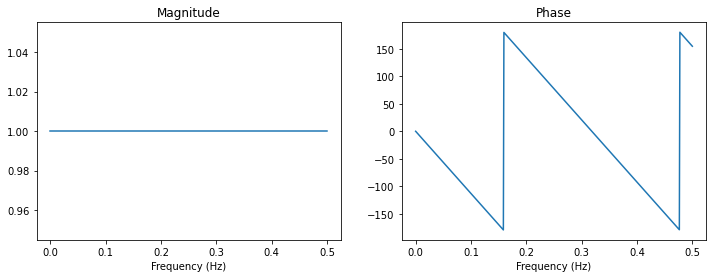

In [12]:
alpha=np.pi
TF = lambda w: np.e**(-1j*alpha*w)

w = np.linspace(0, np.pi, 512)
h = np.vectorize(TF)(w) 
plot_lp(w,h)
# A fase é uma reta e, portanto, o atraso de grupo é constante

A atividade seguinte foi adaptada de [[2](#referencias)]. Carregue o arquivo de dados `gdeldata.mat`. No Python, use a função `loadmat` do módulo `scipy.io` ([documentação](https://docs.scipy.org/doc/scipy/reference/generated/scipy.io.loadmat.html)).

Considere o sinal  apresentado no vetor `x1`. Esse sinal será corrompido por ruído aditivo, mostrado, para fins didáticos, no vetor `noise`. 

J. Observe a faixa de frequências que o sinal e o ruído ocupam. É possível projetar um filtro que recupere o sinal?

In [13]:
# O link da referencia está quebrado, imagino que seja:
# https://www.google.com/url?sa=t&rct=j&q=&esrc=s&source=web&cd=&ved=2ahUKEwj9sYrAlYLyAhUDJrkGHcEtDkgQFjABegQICBAD&url=http%3A%2F%2Fpeople-ece.vse.gmu.edu%2F~kwage%2Fcourses%2Fece535%2Fspr01%2Fmatlab%2Fproj3.pdf

In [14]:
from scipy.io import loadmat

In [15]:
from scipy.fft import fft, fftfreq

def plot_fft(x:np.array, fs:int):
    N = x.shape[0]
    T = 1/fs
    f = fft(x)
    xf = fftfreq(N, T)[:N//2]
    
    plt.plot(xf, 2.0/N * np.abs(f[0:N//2]))
    plt.grid()

In [16]:
d = loadmat('gdeldata.mat')

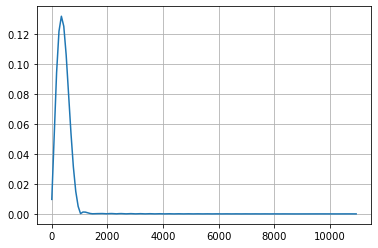

In [17]:
fs = 22050 # What is the sample rate????
plot_fft(d['x1'][0], fs)

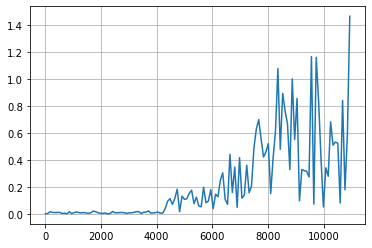

In [18]:
plot_fft(d['noise'][0], fs)

## Fase em Filtros FIR e IIR
Dois filtros foram projetados. O filtro $H_1(z)$, de resposta finita ao impulso, é representado por sua resposta ao impulso no vetor `h`. Já $H_2(z)$, um filtro IIR, é representado por dois vetores de coeficientes, `a` e `b`. 

K. Confirme que os dois filtros apresentam resposta em **magnitude** que permite a recuperação do sinal de interesse. Sobreponha as respostas de cada filtro em um único gráfico.

In [19]:
w, h = freqz(d['h'][0], fs=22050)
plt.plot(w, np.abs(h), label='H1')

w, h = freqz(d['b'][0], d['a'][0], fs=22050)
plt.plot(w, np.abs(h), label='H2')

plt.legend(loc='upper right')
print('Como vemos no gráfico, a frequência de corte está acima da frequência de interesse e abaixo das frequências com maior energia do sinal de ruído. Portanto, a separação é possível')

Como vemos no gráfico, a frequência de corte está acima da frequência de interesse e abaixo das frequências com maior energia do sinal de ruído. Portanto, a separação é possível


Observe a resposta ao impulso do filtro FIR. 

L. É simétrica? Que informação sobre a fase é possível estimar a partir dessa resposta ao impulso? Calcule e mostre o atraso de grupo desse filtro (no Python, com `scipy.signal.group_delay`).

<StemContainer object of 3 artists>

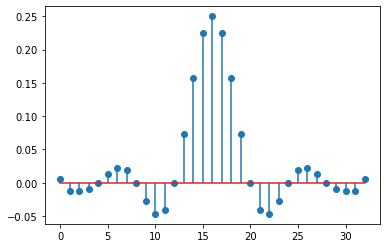

In [20]:
plt.stem(d['h'][0]) #hum... não sei o que concluir

M. Calcule e mostre o atraso de grupo do filtro IIR.

In [21]:
from scipy.signal import group_delay

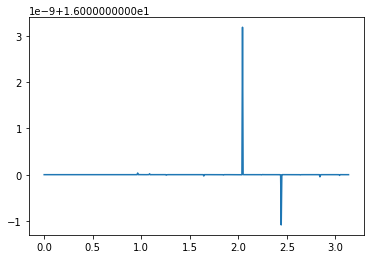

In [22]:
w, wg = group_delay((d['h'][0], [1]))
plt.plot(w, wg) 
# Possui fase linear (atraso de grupo constante), com exceção das descontinuidades

In [23]:
w, wg = group_delay((d['b'][0], d['a'][0]))
plt.plot(w, wg)
# Fase altamente não linear

Filtre o sinal $x_1(n)$ usando cada um dos filtros. 

N. Desenhe e analise os sinais de saída.

In [24]:
def compare_filters(x):
    plt.subplots(1,3, figsize=(15,4))

    plt.subplot(1,3,1)
    plt.title('Original')
    plt.plot(x)

    plt.subplot(1,3,2)
    plt.title('Filtered H1')
    y1 = np.convolve(d['h'][0], x) 
    plt.plot(y1)

    plt.subplot(1,3,3)
    plt.title('Filtered H2')
    y0 = lfilter(d['b'][0], d['a'][0], x)
    plt.plot(y0)

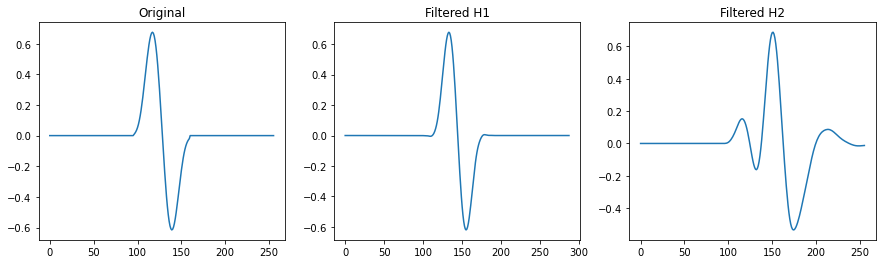

In [25]:
compare_filters(d['x1'][0])
# H1 não distorce o sinal
# H2 distorce o sinal!!!!

## Distorção de Pulso
Filtre o sinal `pulse` com cada um dos filtros. 

O. Desenhe e analise os sinais de saída.

In [26]:
compare_filters(d['pulse'][0])
# H1 não distorce o sinal
# H2 distorce MUITO o sinal!!!!

## Remoção de Ruído de um Pulso
Filtre o sinal `pnd_1` com cada um dos filtros. 

P. Desenhe os sinais de saída e estime o tempo de atraso do pulso de cada um dos sinais resultantes. Explique qual o melhor filtro, FIR ou IIR, para essa aplicação.

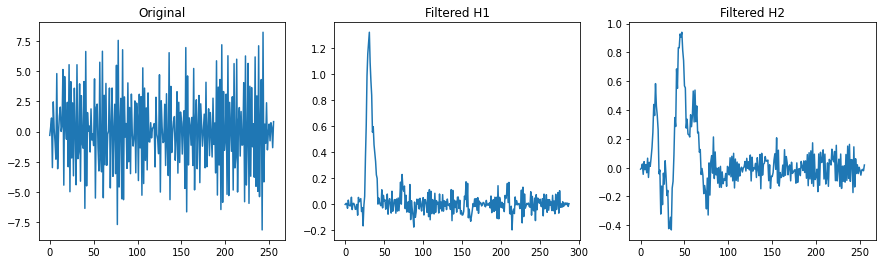

In [27]:
compare_filters(d['pnd_1'][0])
# No filtrado por H1 o pulso se encontra mais próximo do pulso original
# Portanto, esse filtro é mais adequado para a aplicação de radar, onde a temporização é extremamente relevante

# Para estimar o tempo é preciso saber a frequência de amostragem... não encontrei essa informação :(
# O filtro 1 possui atraso de aproxidamente 40 amostras
# O filtro 2 possui atraso de aproxidamente 50 amostras

## Mais informações
Para uma visão geral gráfica sobre sistemas radar, confira as Figuras 1-1, 1-2 e 1-3 de [[3](#referencias)]. Sobre filtros casados, utilizados em sistemas radar, são interessantes os exemplos de [[4](#referencias)].

# [Referências](#referencias)

[1] Oppenheim, A. V.; Schafer, R. W. Processamento em tempo discreto de sinais. 3. ed. São Paulo:Pearson, 2012.

[2] ECE 535 Digital Signal Processing: Matlab Assignment 3: Group Delay, Spring 2001. Disponível em: https://ece.gmu.edu/~kwage/courses/ece535/spr01/matlab/proj3.pdf

[3] ROHDE&SCHWARZ Pulsed RADAR signal generation and measurements : Educational Note 1MA234_0e. Disponível em: https://cdn.rohde-schwarz.com/pws/dl_downloads/dl_application/application_notes/1ma234/1MA234_0e_PulsedRadarEduNote.pdf

[4] WIKIPEDIA. Matched Filter: Examples. Disponível em: https://en.wikipedia.org/wiki/Matched_filter#Examples